In [1]:
from fastai.vision.all import *

In [9]:
path = Path("/raid/cs152/SpoonOrFork")
path.ls()

(#2) [Path('/raid/cs152/SpoonOrFork/spoon'),Path('/raid/cs152/SpoonOrFork/fork')]

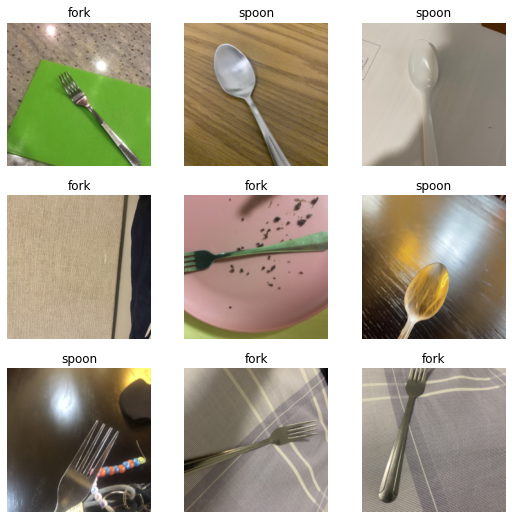

In [22]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))
dls.show_batch()
# file <filename> on invalid files

In [24]:
print("Validation dataset size:", len(dls.valid_ds))
print("Training dataset size:", len(dls.train_ds))

Validation dataset size: 96
Training dataset size: 386


In [25]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

/opt/mambaforge/envs/cs152/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-pma2oi4d/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,1.107742,0.659462,0.760417,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.478254,0.648302,0.812500,00:33


SuggestedLRs(valley=0.00010964782268274575)

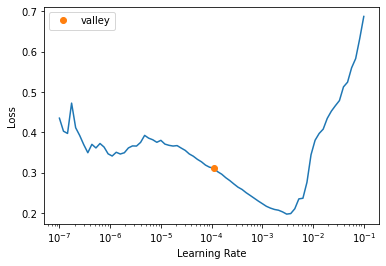

In [26]:
learn.lr_find()

In [27]:
lr = 0.0001
learn.fine_tune(2, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.364607,0.524311,0.833333,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.324790,0.477970,0.822917,00:33
1,0.307125,0.455475,0.822917,00:33


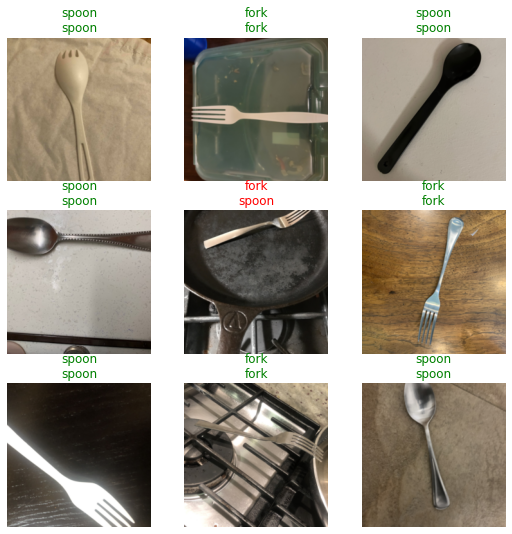

In [28]:
learn.show_results()

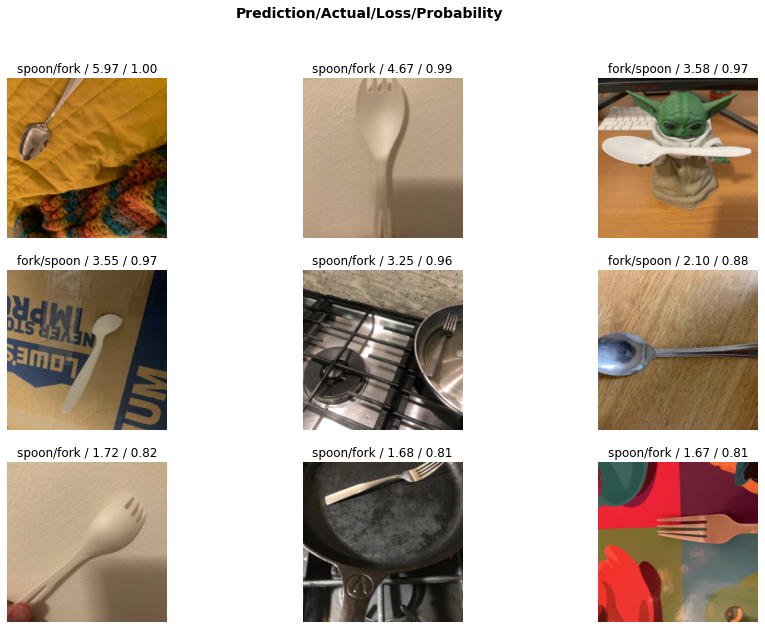

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15, 10))

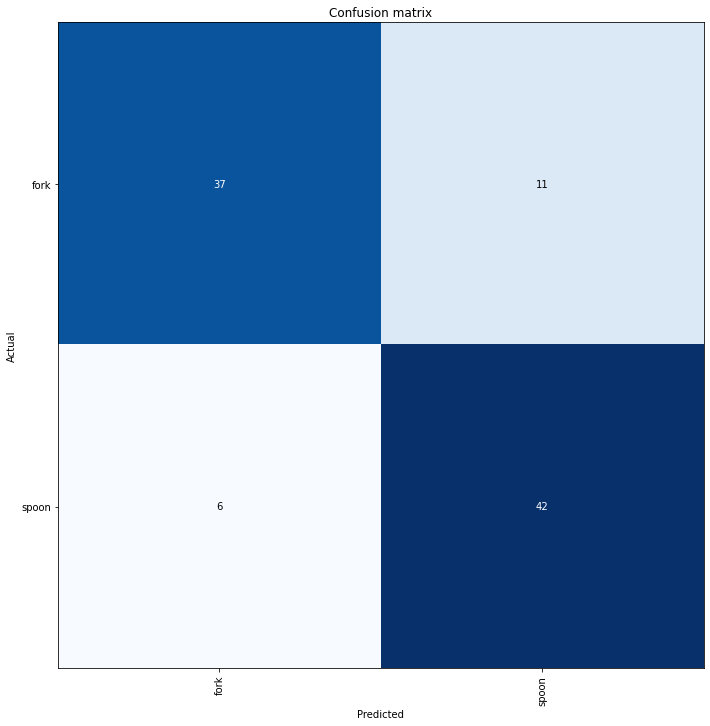

In [30]:
interp.plot_confusion_matrix(figsize=(10, 10))

In [31]:
learn.export("resnet18-1.pkl")